In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [4]:
gas_prices = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/data/raw/fuel/fuel_wholesale_price/EIA-STEO_NGSPUUK_M (1).csv')
gas_prices.head()

,Date,Value
0,2017-12-31,7.618882
1,2017-11-30,7.897095
2,2017-10-31,7.138350
3,2017-09-30,6.770626
4,2017-08-31,6.334714


In [5]:
gas_prices['Date'] = pd.to_datetime(gas_prices['Date'])
gas_prices.head()

,Date,Value
0,2017-12-31,7.618882
1,2017-11-30,7.897095
2,2017-10-31,7.138350
3,2017-09-30,6.770626
4,2017-08-31,6.334714


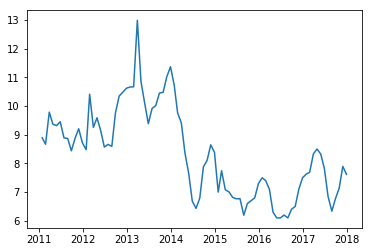

In [6]:
plt.plot(gas_prices.Date, gas_prices.Value)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1180ad780>]],
      dtype=object)

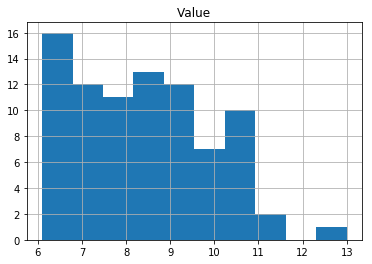

In [7]:
gas_prices.hist()

Standard deviation for each year

In [8]:
gas_prices_group = gas_prices.groupby(gas_prices.Date.dt.year)
gas_prices_group.std()

,Value
Date,
2011,0.386908
2012,0.824890
2013,0.909880
2014,1.292635
2015,0.382562
2016,0.580687
2017,0.681188


In [9]:
gas_prices_group.std()

,Value
Date,
2011,0.386908
2012,0.824890
2013,0.909880
2014,1.292635
2015,0.382562
2016,0.580687
2017,0.681188


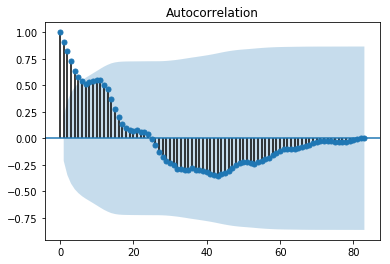

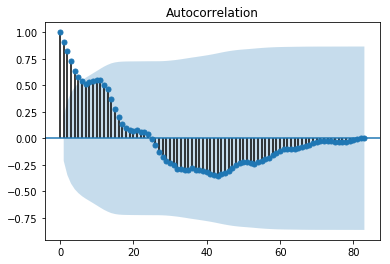

In [12]:
plot_acf(gas_prices['Value'])

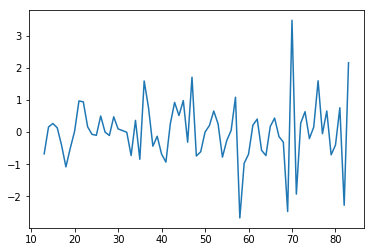

In [33]:
gas_prices['diff_1'] = gas_prices.Value.diff().diff(periods=12)
gas_prices
plt.plot(gas_prices['diff_1'])
gas_prices = gas_prices.dropna()

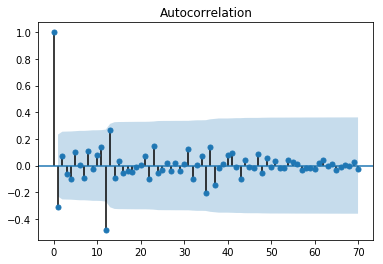

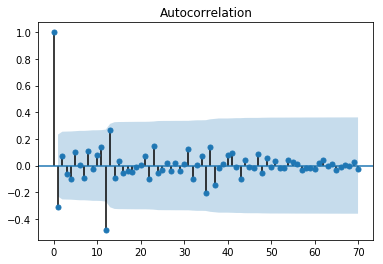

In [34]:
plot_acf(gas_prices['diff_1'])

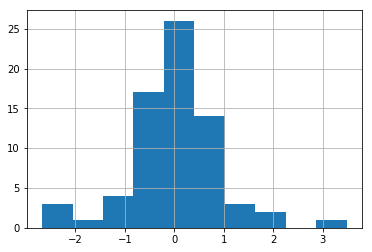

In [36]:
gas_prices['diff_1'].hist()

In [35]:
gas_prices['diff_1'].std()

0.9678526811662029